Refer SKlearn official Documnetation if yor are sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

# Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings 
warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
ds=pd.read_csv("https://raw.githubusercontent.com/s4sauravv/Datasets/main/Admission_Prediction.csv")
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


# Data Exploration

In [3]:
ds.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [4]:
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
ds.shape

(500, 9)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


# Finding the missing values

In [7]:
ds.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
ds.fillna(method='ffill',inplace=True)

In [9]:
ds.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

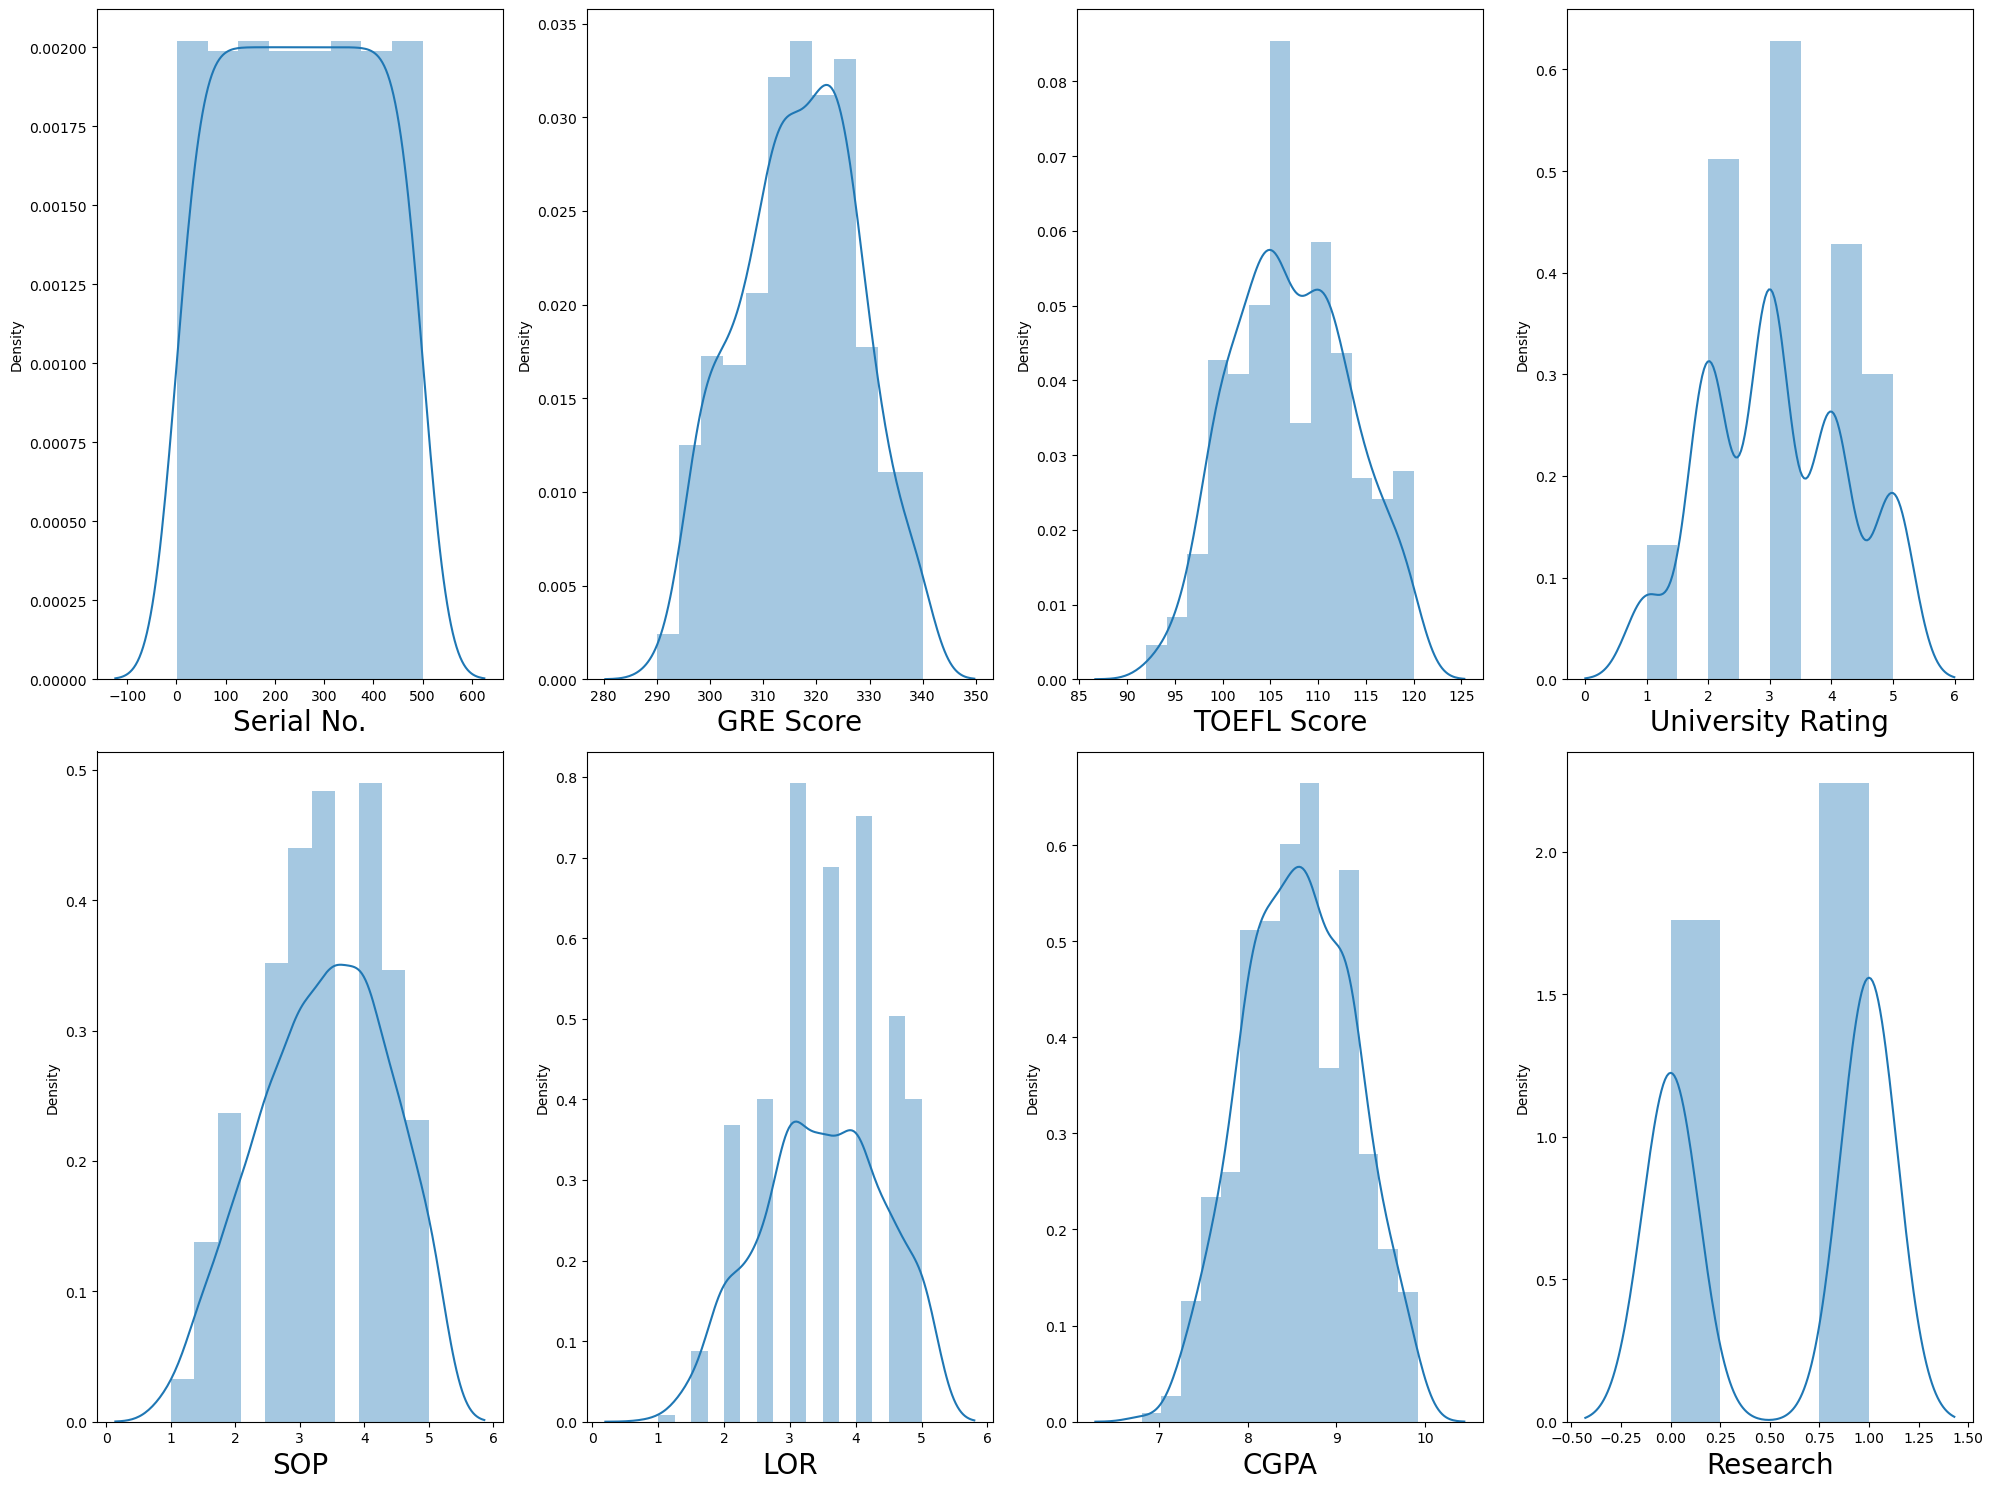

In [17]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(ds.columns[:8]):
    plt.subplot(2, 4, i + 1)
    sns.distplot(ds[column])
    plt.xlabel(column, fontsize=20)

plt.tight_layout()
plt.show()

In [11]:
ds.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [19]:
x=ds[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research']]
y=ds[['Chance of Admit']]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_predict=model.predict(x_test)

In [24]:
model.score(x_test,y_test)

0.7650932636118352